Initial Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset with Missing Values:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4    

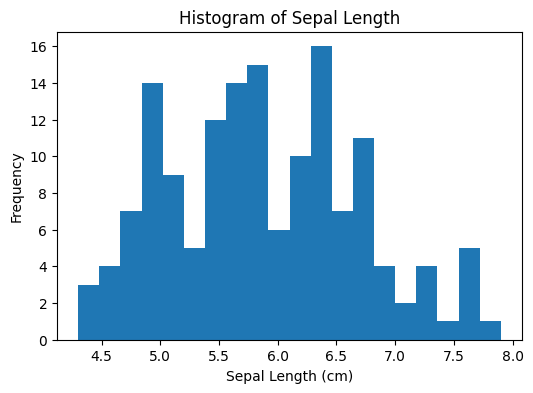

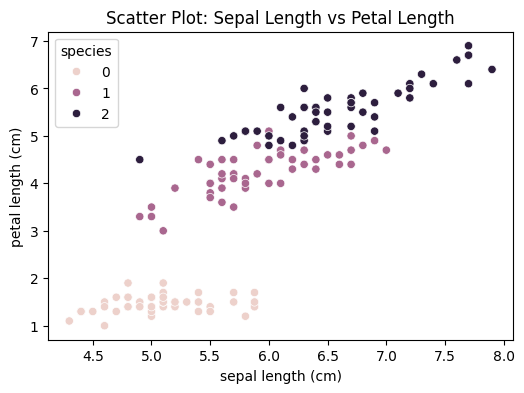

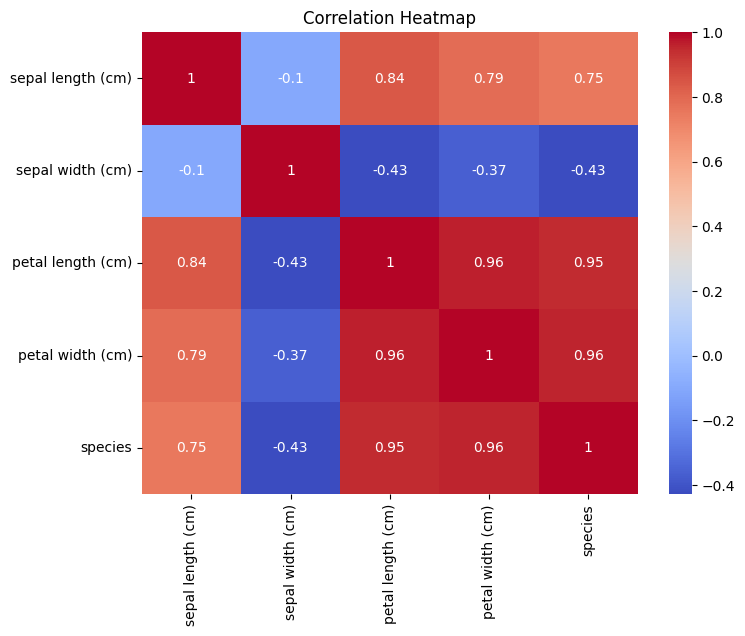

In [1]:
# Week 1 ML Lab Experiment

# 1. Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 2. Load sample dataset (Iris)
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Initial Dataset:")
print(df.head())

# 3. Introduce missing values (for demonstration)
df.iloc[5:10, 0] = np.nan

print("\nDataset with Missing Values:")
print(df.head(10))

# 4. Handle missing values (mean imputation)
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nAfter Handling Missing Values:")
print(df.head(10))

# 5. Encode categorical data
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

print("\nAfter Encoding Categorical Data:")
print(df.head())

# 6. Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.iloc[:, :-1])

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['species'] = df['species']

print("\nScaled Dataset:")
print(scaled_df.head())

# 7. Plot Histogram
plt.figure(figsize=(6,4))
plt.hist(df['sepal length (cm)'], bins=20)
plt.title("Histogram of Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# 8. Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='sepal length (cm)',
    y='petal length (cm)',
    hue='species',
    data=df
)
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.show()

# 9. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
